In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import io
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import random

In [61]:
data = pd.read_csv("/Users/raunavsharma/Downloads/archive/Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [62]:
data.shape

(500, 9)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [13]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [64]:
data.drop("Serial No.", axis = 1, inplace = True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [68]:
x = data[["GRE Score", "TOEFL Score", "CGPA"]]
y = data[["Chance of Admit "]]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=.20)

In [71]:
reg = LinearRegression()

In [72]:
reg.fit(x_train,y_train)

LinearRegression()

In [80]:
predictions = reg.predict(x_test)

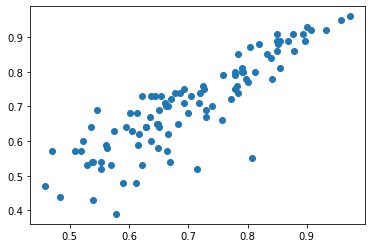

In [81]:
plt.scatter(predictions,y_test)

In [75]:
y_predict = reg.predict(x_test)
y_predict[:10]

array([[0.62802152],
       [0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891],
       [0.66888863],
       [0.55297329],
       [0.68293116],
       [0.55296602],
       [0.7583334 ]])

In [76]:
y_test[:10]

,Chance of Admit
90,0.64
254,0.85
283,0.80
445,0.91
461,0.68
15,0.54
316,0.54
489,0.65
159,0.52
153,0.79


/Users/raunavsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

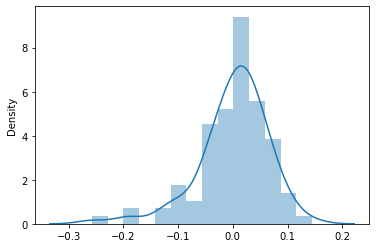

In [86]:
sns.distplot(y_test - predictions)
#where the x axis is the chance of admit

In [78]:
metrics.mean_absolute_error(y_test,y_predict)

0.04688621359385716

In [ ]:
# Therefore, my model is 96% correct as there is only a 4% error. 

In [89]:
rando = RandomForestRegressor()
rando.fit(x,y)

<ipython-input-89-2e17a09652a7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rando.fit(x,y)


RandomForestRegressor()

In [90]:
ImportantVar = pd.DataFrame()
ImportantVar['Features'] = x.columns
ImportantVar['Importance'] = rando.feature_importances_
ImportantVar.sort_values('Importance' ,ascending=False)

## we see that CGPA is the most important factor to decide whether a student goes to college or not

,Features,Importance
2,CGPA,0.853617
0,GRE Score,0.090627
1,TOEFL Score,0.055757


In [102]:
#comparison of the various models
# here I've shown the different RMSE scores and R Squared scores for various complex models but as shown in our above model, it works best as comapred to these other ones.
models = [['DecisionTree :',DecisionTreeRegressor()], ['Linear Regression :', LinearRegression()], ['RandomForest :',RandomForestRegressor()], ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)], ['SVM :', SVR()], ['AdaBoostClassifier :', AdaBoostRegressor()], ['GradientBoostingClassifier: ', GradientBoostingRegressor()], ['Lasso: ', Lasso()], ['Ridge: ', Ridge()], ['ElasticNet: ', ElasticNet()]]
for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print('RMSE Score ',name, (np.sqrt(mean_squared_error(y_test, predictions))))
    print('R Squared Score ',name, (r2_score(y_test, predictions)))
    print('\n')

RMSE Score  DecisionTree : 0.08715790268243036
R Squared Score  DecisionTree : 0.5650381482700868


RMSE Score  Linear Regression : 0.06429711483165403
R Squared Score  Linear Regression : 0.7632878240069337


RMSE Score  RandomForest : 0.06700702375787847
R Squared Score  RandomForest : 0.7429140850634055


RMSE Score  KNeighbours : 0.08987908544261006
R Squared Score  KNeighbours : 0.5374540145149516


RMSE Score  SVM : 0.07920621899799604
R Squared Score  SVM : 0.6407835710240051




<ipython-input-102-c36b3d5d6343>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/Users/raunavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/raunavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/raunavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

RMSE Score  AdaBoostClassifier : 0.06720391715125056
R Squared Score  AdaBoostClassifier : 0.7414010231768478


RMSE Score  GradientBoostingClassifier:  0.06785432393496282
R Squared Score  GradientBoostingClassifier:  0.736371303530204


RMSE Score  Lasso:  0.11378366464956308
R Squared Score  Lasso:  0.25869409289659273


RMSE Score  Ridge:  0.0643348969536732
R Squared Score  Ridge:  0.7630095497479352


RMSE Score  ElasticNet:  0.09047275773236782
R Squared Score  ElasticNet:  0.5313233861521224


